In [5]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()
print(x_train.shape, t_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [3]:
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [11]:
import matplotlib.pyplot as plt

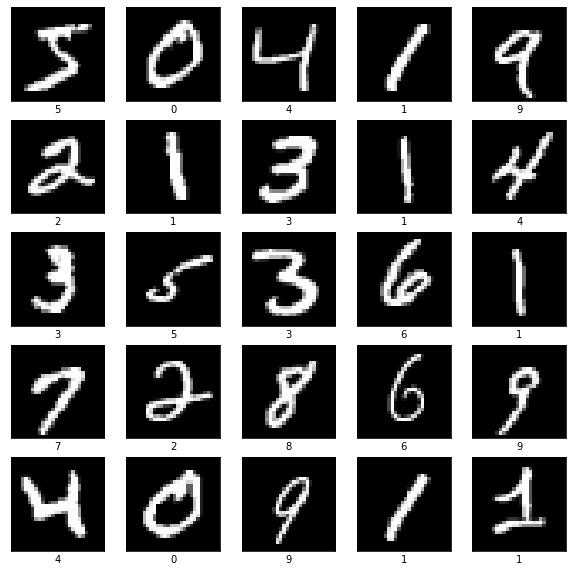

In [14]:
plt.figure(figsize = (10, 10))

for index in range(25):
  
  plt.subplot(5, 5, index + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train.reshape(-1, 28, 28)[index], cmap = 'gray')
  plt.xlabel(str(t_train[index]))

plt.show()

In [35]:
model = Sequential() # sequential 이기 때문에 자동으로 indexing이 된다.

model.add(Conv2D(input_shape = (28, 28, 1), filters = 32, kernel_size = 3, padding = 'SAME', activation = 'relu', ))
model.add(MaxPool2D(padding = 'SAME', pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'SAME', activation = 'relu'))
model.add(MaxPool2D(padding = 'SAME', pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'SAME', activation = 'relu'))
model.add(MaxPool2D(padding = 'SAME', pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(10, activation = 'softmax'))

In [7]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [37]:
for layer in model.layers:

  if 'conv' in layer.name:
    print(layer.name, layer.output.shape[1:])

conv2d_3 (28, 28, 32)
conv2d_4 (14, 14, 64)
conv2d_5 (7, 7, 128)


In [9]:
for idx in range(len(model.layers)):
  print('model.layer[%d] = %s, %s' %(idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layer[0] = conv2d, (None, 28, 28, 32)
model.layer[1] = max_pooling2d, (None, 14, 14, 32)
model.layer[2] = dropout, (None, 14, 14, 32)
model.layer[3] = conv2d_1, (None, 14, 14, 64)
model.layer[4] = max_pooling2d_1, (None, 7, 7, 64)
model.layer[5] = dropout_1, (None, 7, 7, 64)
model.layer[6] = conv2d_2, (None, 7, 7, 128)
model.layer[7] = max_pooling2d_2, (None, 4, 4, 128)
model.layer[8] = dropout_2, (None, 4, 4, 128)
model.layer[9] = flatten, (None, 2048)
model.layer[10] = dense, (None, 10)


In [15]:
from tensorflow.keras.models import Model

partial_model = Model(inputs = model.inputs, outputs = model.layers[0].output)

partial_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


1229


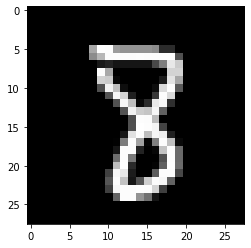

In [17]:
import numpy as np

random_idx = np.random.randint(0, len(x_test))

print(random_idx)

plt.imshow(x_test[random_idx].reshape(28, 28), cmap = 'gray')

In [18]:
feature_map = partial_model.predict(x_test[random_idx].reshape(-1, 28, 28, 1))

print(feature_map.shape)

fm = feature_map[0]

print(fm.shape)

(1, 28, 28, 32)
(28, 28, 32)


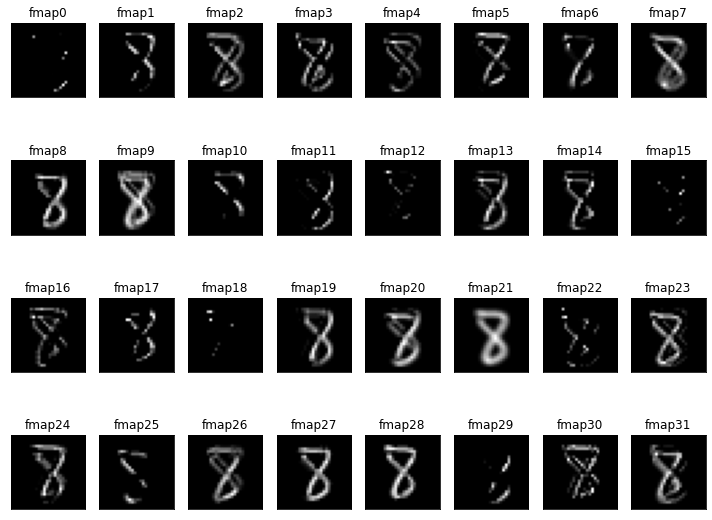

In [20]:
plt.figure(figsize = (10, 8))

for i in range(32):
  
  plt.subplot(4, 8, i+1)

  plt.imshow(fm[:, :, i], cmap = 'gray')

  plt.xticks([]); plt.yticks([])
  plt.title('fmap' + str(i))

plt.tight_layout()
plt.show()

In [21]:
partial_model = Model(inputs = model.inputs, outputs = model.layers[1].output)

partial_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [22]:
pooling_map = partial_model.predict(x_test[random_idx].reshape(-1, 28, 28, 1))

print(pooling_map.shape)

pm = pooling_map[0]

print(pm.shape)

(1, 14, 14, 32)
(14, 14, 32)


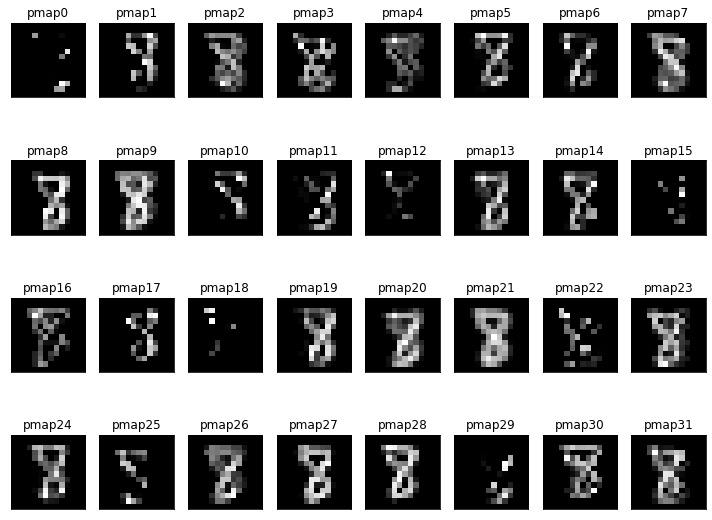

In [23]:
plt.figure(figsize = (10, 8))

for i in range(32):
  
  plt.subplot(4, 8, i+1)

  plt.imshow(pm[:, :, i], cmap = 'gray')

  plt.xticks([]) ; plt.yticks([])
  plt.title('pmap' + str(i))

plt.tight_layout()
plt.show()

In [25]:
hist = model.fit(x_train.reshape(-1, 28, 28, 1), t_train, batch_size = 64, epochs = 50, validation_data= (x_test, t_test))

Epoch 1/50
938/938 [==============================] - 13s 11ms/step - loss: 0.2320 - accuracy: 0.9260 - val_loss: 0.0481 - val_accuracy: 0.9845
Epoch 2/50
938/938 [==============================] - 10s 11ms/step - loss: 0.0692 - accuracy: 0.9782 - val_loss: 0.0313 - val_accuracy: 0.9894
Epoch 3/50
938/938 [==============================] - 10s 10ms/step - loss: 0.0550 - accuracy: 0.9828 - val_loss: 0.0283 - val_accuracy: 0.9911
Epoch 4/50
938/938 [==============================] - 10s 10ms/step - loss: 0.0444 - accuracy: 0.9854 - val_loss: 0.0246 - val_accuracy: 0.9924
Epoch 5/50
938/938 [==============================] - 10s 11ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0247 - val_accuracy: 0.9915
Epoch 6/50
938/938 [==============================] - 12s 12ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0262 - val_accuracy: 0.9913
Epoch 7/50
938/938 [==============================] - 12s 13ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.0202 - val_accuracy:

In [26]:
model.evaluate(x_test.reshape(-1, 28, 28, 1), t_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0268 - accuracy: 0.9938


[0.026811202988028526, 0.9937999844551086]

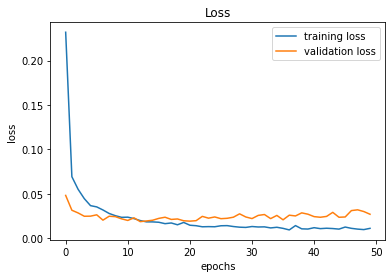

In [27]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

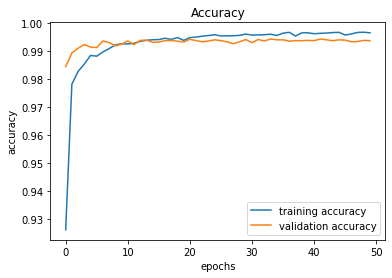

In [28]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')

plt.show()

In [29]:
for idx in range(len(model.layers)):
  print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = conv2d, (None, 28, 28, 32)
model.layers[1] = max_pooling2d, (None, 14, 14, 32)
model.layers[2] = dropout, (None, 14, 14, 32)
model.layers[3] = conv2d_1, (None, 14, 14, 64)
model.layers[4] = max_pooling2d_1, (None, 7, 7, 64)
model.layers[5] = dropout_1, (None, 7, 7, 64)
model.layers[6] = conv2d_2, (None, 7, 7, 128)
model.layers[7] = max_pooling2d_2, (None, 4, 4, 128)
model.layers[8] = dropout_2, (None, 4, 4, 128)
model.layers[9] = flatten, (None, 2048)
model.layers[10] = dense, (None, 10)


In [30]:
from tensorflow.keras.models import Model

partial_model = Model(inputs = model.inputs, outputs = model.layers[0].output)

partial_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [31]:
feature_map = partial_model.predict(x_test[random_idx].reshape(-1, 28, 28, 1))

print(feature_map.shape)

fm = feature_map[0]

print(fm.shape)

(1, 28, 28, 32)
(28, 28, 32)


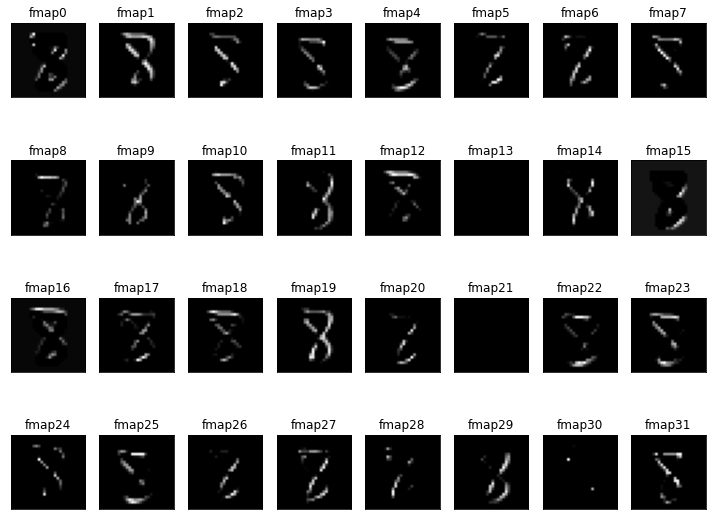

In [34]:
plt.figure(figsize = (10, 8))

for i in range(32):

  plt.subplot(4, 8, i+1)

  plt.imshow(fm[:, :, i], cmap = 'gray')

  plt.xticks([]); plt.yticks([])
  plt.title('fmap' + str(i))

plt.tight_layout()
plt.show()

In [39]:
partial_model = Model(inputs = model.inputs, outputs = model.layers[1].output)

partial_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


# Functional API

In [40]:
from tensorflow.keras.layers import Input

In [47]:
input_ = Input(shape = (28, 28, 1))

conv_1 = Conv2D(filters = 32, kernel_size = 3, padding = 'SAME', activation = 'relu')(input_)
pool_1 = MaxPool2D(pool_size = (2, 2), padding = 'SAME')(conv_1)
dropout_1 = Dropout(0.25)(pool_1)

conv_2 = Conv2D(filters = 64, kernel_size = 3, padding = 'SAME', activation = 'relu')(dropout_1)
pool_2 = MaxPool2D(pool_size = (2, 2), padding = 'SAME')(conv_2)
dropout_2 = Dropout(0.25)(pool_2)

conv_3 = Conv2D(filters = 128, kernel_size = 3, padding = 'SAME', activation = 'relu')(pool_2)
pool_3 = MaxPool2D(pool_size = (2, 2), padding = 'SAME')(conv_3)
dropout_3 = Dropout(0.25)(pool_3)

flatten = Flatten()(dropout_3)

output_ = Dense(10, activation = 'softmax')(flatten)

In [48]:
model = Model(inputs = input_, outputs = output_)

In [49]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(0.001), metrics = ['accuracy'])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                      

In [50]:
for i in range(len(model.layers)):
  print(i, model.layers[i].name, model.layers[i].output.shape)

0 input_5 (None, 28, 28, 1)
1 conv2d_14 (None, 28, 28, 32)
2 max_pooling2d_13 (None, 14, 14, 32)
3 dropout_13 (None, 14, 14, 32)
4 conv2d_15 (None, 14, 14, 64)
5 max_pooling2d_14 (None, 7, 7, 64)
6 conv2d_16 (None, 7, 7, 128)
7 max_pooling2d_15 (None, 4, 4, 128)
8 dropout_15 (None, 4, 4, 128)
9 flatten_4 (None, 2048)
10 dense_4 (None, 10)


In [52]:
partial_model = Model(inputs = model.input, outputs = model.layers[1].output)

partial_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [57]:
feature_map = partial_model.predict(x_test)

print(feature_map.reshape(-1, 28, 28, 32))

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb429533c20> (for post_execute):


KeyboardInterrupt: ignored

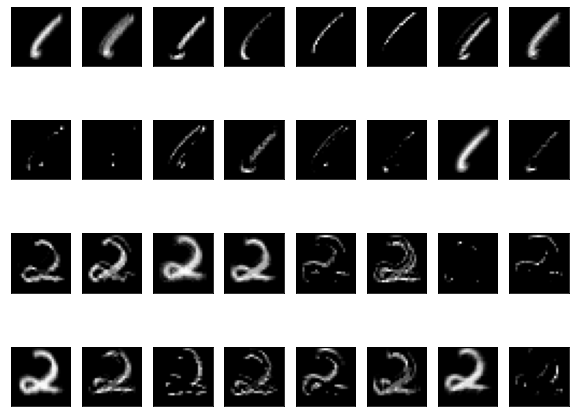

In [ ]:
plt.figure(figsize = (10, 8))

for idx in range(len(x_test)):

  for i in range(32):
    
    plt.subplot(4, 8, i+1)

    plt.imshow(feature_map[idx, :, :, i], cmap = 'gray')

    plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.show()